In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import squarify

from utils import *
from matplotlib import pyplot as plt
from pymongo import MongoClient

### Parâmetros do matplot e Seaborn

In [6]:
%matplotlib inline
pd.options.mode.chained_assignment = None 
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(rc={'figure.figsize':(15,10)})

### Recuperação de Datasets do MongoDB

In [ ]:
df_tipos_infracoes_2018 = mongo_to_dataframe("tipos_infracoes_2018")

In [27]:
df_acidentes_fatais_2008_2017 = mongo_to_dataframe("acidentes_fatais_2008_2017")

In [ ]:
df_pedestres_mortos_trechos_ns_2008_2017 = mongo_to_dataframe("pedestres_mortos_trechos_ns_2008_2017")

In [30]:
df_acidentes_rodovias_2010_2019 = mongo_to_dataframe("acidentes_rodovias_2010_2019")

In [ ]:
df_frota_veiculos_2009_2019 = mongo_to_dataframe("frota_veiculos_2009_2019")

In [32]:
df_numero_habilitados_2009_2018 = mongo_to_dataframe("numero_habilitados_2009_2018")

In [ ]:
df_infracoes_prf_2010_2018 = mongo_to_dataframe("infracoes_prf_2010_2018")

In [2]:
df_demografia_2015_2016 = mongo_to_dataframe("demografia_brasilia_2015_2016")

In [ ]:
df_infracoes_der_2018_2019 = mongo_to_dataframe("infracoes_der_2018_2019")

In [ ]:
df_indice_mortos_transito_2009_2010 = mongo_to_dataframe("indice_mortos_transito_2009_2018")

In [124]:
df_sinalizacao_2018 = mongo_to_dataframe("sinalizacao_2018")

In [125]:
df_equipamentos_fiscalizacao_2018 = mongo_to_dataframe("equipamentos_fiscalizacao_2018")

In [118]:
df_faixas_por_ra_2018 = mongo_to_dataframe("faixas_por_ra_2018")

In [119]:
df_condicoes_rodovias_2018 = mongo_to_dataframe("condicoes_rodovias_2018")

## Análise da relação da distribuição de acidentes graves de trânsito nas regiões administrativas do DF

### Observações

* Comparando o número das populações das cidades com mais acidentes é possível determinar que o tamanho da população está diretamente relacionado com o número de acidentes fatais
* A correlação de pearson mostra uma relação forte, positiva de inclinação 0.92
* O rank das cidades com maiores populações é quase o mesmo das cidades com maior número de acidentes
* A correlação entre o número de acidentes fatais em uma região e sua renda per capita é média e negativa, indicando uma possível proporção inversa (Regiões com rendas maiores tem população menor)
* As correlações mais fortes são diretamente com o número da população, visto que as correlações entre densidade e acidentes são irrelevantes.

In [4]:
df_demografia_2015_2016.head()

,RA,População 2013,População 2015/2016,TMGCA (%),Área com Ocupação Urbana (em ha),Densidade Urbana 2015,Área Total da RA (em ha),Densidade Demográfica 2015,Casas (%),Apart + Quit (%),Distância do Centro (Plano Piloto) em Km,Grupo de Renda,Renda Per Capita 2015
0,RA XXIII - Varjão,9292,8453,-4.62,59.42,142.27,75.56,111.87,75.75,20.44,11,Baixa,627.81
1,RA XIX - Candangolândia,16886,15641,-3.76,113.85,137.38,662.70,23.60,87.20,12.00,11,Média Baixa Renda,1460.98
2,RA IX - Ceilândia,451872,479713,3.03,3691.92,129.94,23401.14,20.50,94.36,4.25,26,Média Baixa Renda,914.61
3,RA XV - Recanto das Emas,138997,146906,2.81,1246.27,117.88,10261.11,14.32,96.98,2.76,26,Média Baixa Renda,803.92
4,RA XIV - São Sebastião,98908,99525,0.31,882.69,112.75,35571.37,2.80,92.71,6.61,26,Média Baixa Renda,966.96


In [11]:
df_demografia_2015_2016 = df_demografia_2015_2016[df_demografia_2015_2016['RA'] != 'DISTRITO FEDERAL - DF']

In [26]:
cidades_mais_populosas = df_demografia_2015_2016.sort_values('População 2015/2016', ascending = False)
cidades_mais_populosas.head(n = 7)

,RA,População 2013,População 2015/2016,TMGCA (%),Área com Ocupação Urbana (em ha),Densidade Urbana 2015,Área Total da RA (em ha),Densidade Demográfica 2015,Casas (%),Apart + Quit (%),Distância do Centro (Plano Piloto) em Km,Grupo de Renda,Renda Per Capita 2015
2,RA IX - Ceilândia,451872,479713,3.03,3691.92,129.94,23401.14,20.50,94.36,4.25,26,Média Baixa Renda,914.61
7,RA XII - Samambaia,228356,258457,6.39,2501.67,103.31,10125.85,25.52,89.29,10.49,25,Média Baixa Renda,914.75
25,RA I - Plano Piloto,216489,210067,-1.49,10176.75,20.64,40989.31,5.12,9.19,90.45,0,Alta,5559.75
14,RA III - Taguatinga,212863,207045,-1.38,2572.11,80.50,8056.15,25.70,69.73,30.00,21,Média Alta Renda,1998.14
18,RA VI - Planaltina,185375,190495,1.37,2989.46,63.72,153847.95,1.24,94.49,4.86,38,Média Baixa Renda,933.8
3,RA XV - Recanto das Emas,138997,146906,2.81,1246.27,117.88,10261.11,14.32,96.98,2.76,26,Média Baixa Renda,803.92
17,RA XX - Águas Claras,118864,138562,7.97,1937.03,71.53,2285.82,60.62,23.06,76.84,19,Média Alta Renda,3339.91


Text(0.5, 1.0, 'Treemap das regiões mais populosas do DF')

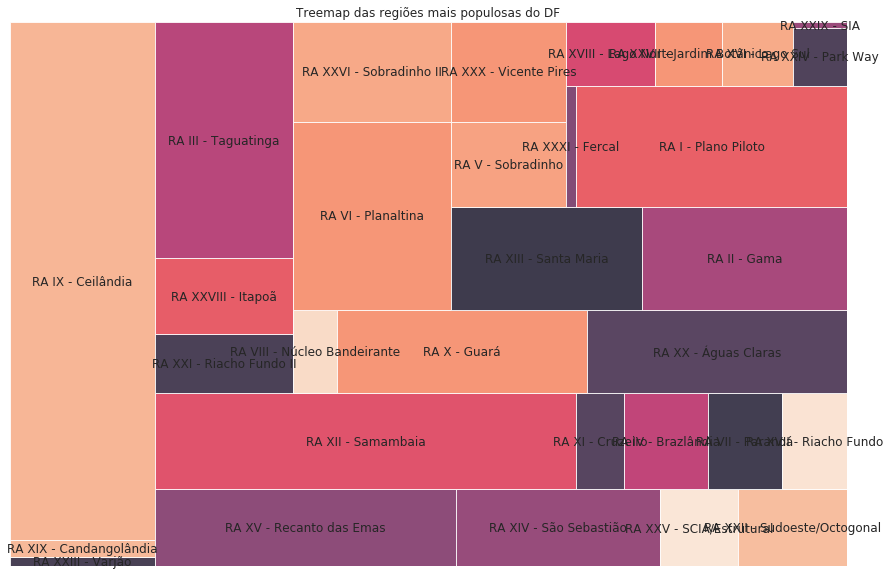

In [63]:
squarify.plot(sizes = df_demografia_2015_2016['População 2015/2016'], label = df_demografia_2015_2016['RA'], alpha = .8 )
plt.rcParams['figure.figsize'] = [15, 10]
plt.axis('off')
plt.title('Treemap das regiões mais populosas do DF')

In [ ]:
df_acidentes_fatais_2008_2017 = df_acidentes_fatais_2008_2017[df_acidentes_fatais_2008_2017['Ano'] == '2016']

In [114]:
def pearson_corr_demografia_acidentes(atributo_demografia):
    acidentes_fatais_por_regiao = df_acidentes_fatais_2008_2017.groupby('Região Administrativa').size().reset_index(name = 'contagem')
    acidentes_fatais_por_regiao = acidentes_fatais_por_regiao.sort_values('contagem', ascending = False)
    
    df_demografia = df_demografia_2015_2016[['RA', atributo_demografia]]
    cidades = df_demografia.RA.str.split(' - ', n = 1, expand = True)
    df_demografia.RA = cidades[1]
    df_demografia.RA = df_demografia.RA.str.upper()
    
    atributo_por_populacao = pd.merge(acidentes_fatais_por_regiao, df_demografia, left_on = 'Região Administrativa', right_on = 'RA')
    
    if atributo_demografia == 'População 2015/2016':
        correlacao_atributo_por_populacao = atributo_por_populacao['contagem'].corr(atributo_por_populacao[atributo_demografia])
    else:
        correlacao_atributo_por_populacao = atributo_por_populacao['contagem'].corr(atributo_por_populacao[atributo_demografia].astype(int))
        atributo_por_populacao[atributo_demografia] = atributo_por_populacao[atributo_demografia].astype(int)
    
    
    print('Valor da correlação: {}'.format(correlacao_atributo_por_populacao))
    sns.regplot(x = 'contagem', y = atributo_demografia, data = atributo_por_populacao, fit_reg = True)
    plt.title("Correlação entre número de acidentes fatais e " + atributo_demografia)
    plt.show()
    

Valor da correlação: 0.914795382608649


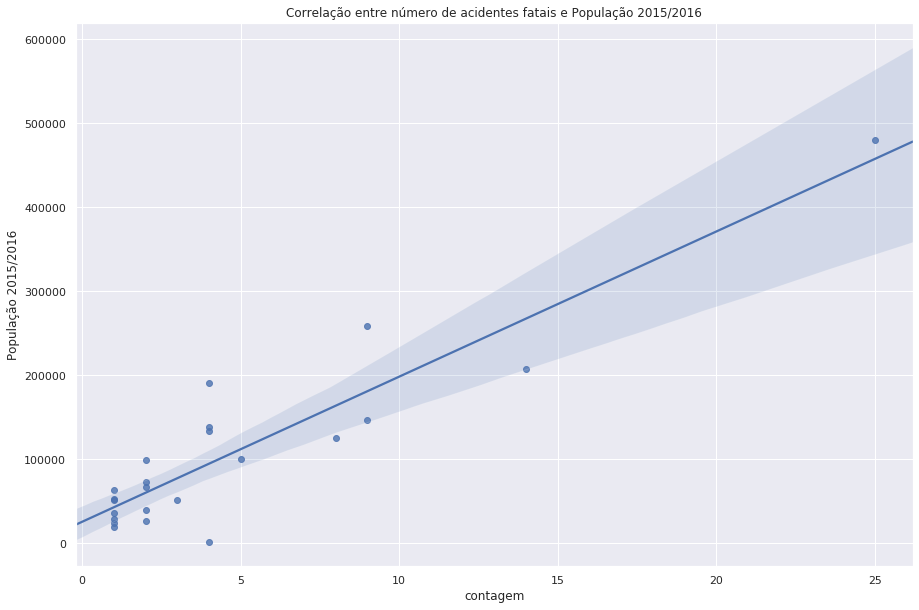

In [115]:
pearson_corr_demografia_acidentes('População 2015/2016')

Valor da correlação: -0.3568240448794187


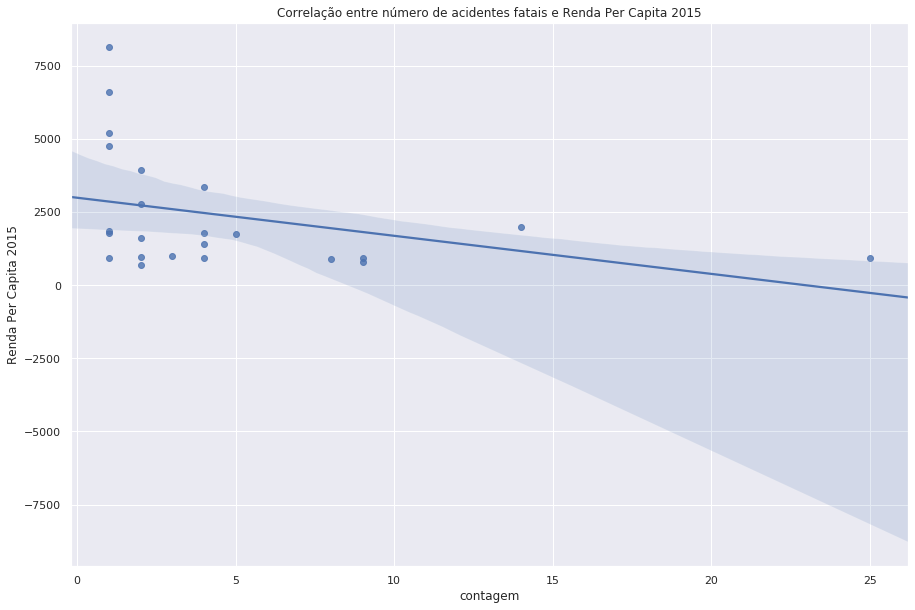

In [116]:
pearson_corr_demografia_acidentes('Renda Per Capita 2015')

Valor da correlação: 0.2949743131325557


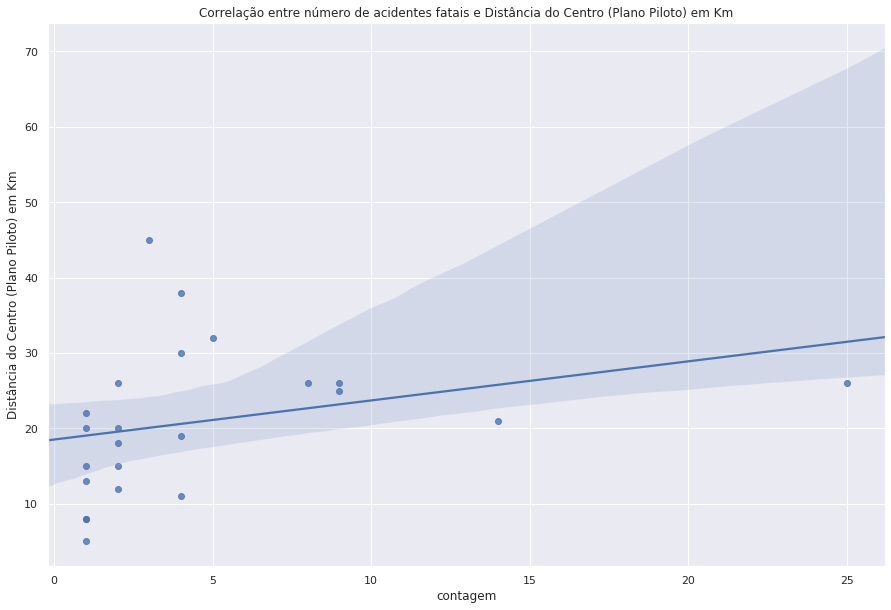

In [117]:
pearson_corr_demografia_acidentes('Distância do Centro (Plano Piloto) em Km')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

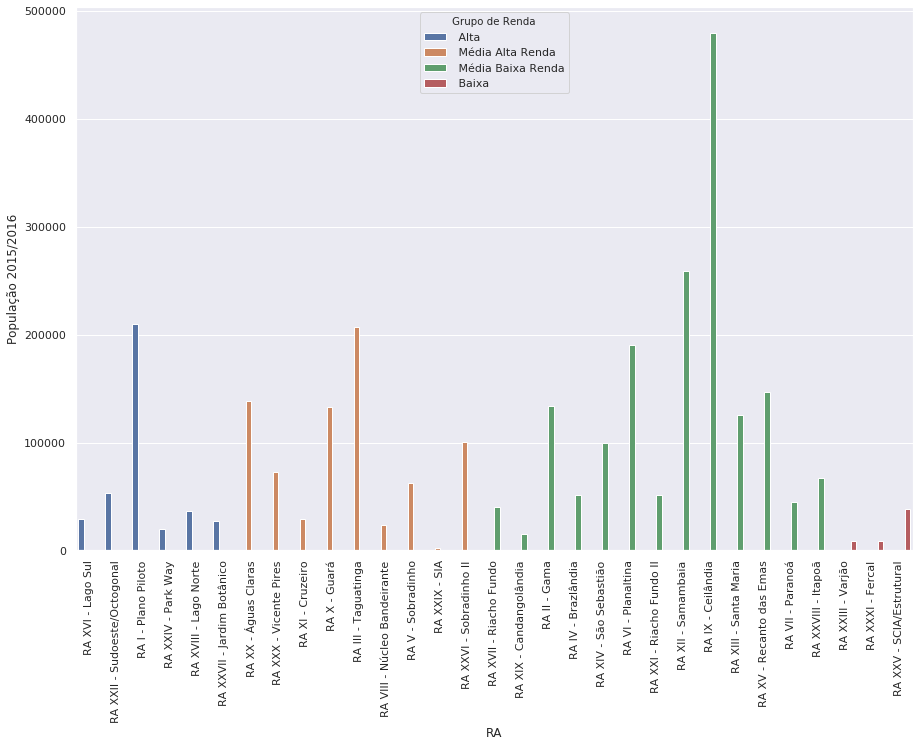

In [108]:
regioes_por_renda = df_demografia_2015_2016.groupby(['RA', 'Renda Per Capita 2015', 'Grupo de Renda', 'População 2015/2016']).size().reset_index().sort_values('Renda Per Capita 2015', ascending = False)
regioes_por_renda
sns.barplot(x = 'RA', y = 'População 2015/2016', hue = 'Grupo de Renda', data = regioes_por_renda)
plt.xticks(rotation = 90)

In [135]:
df_sinalizacao_2018.groupby(['Região Administrativa', 'Horizontal', 'Vertical']).size().reset_index()\
.sort_values(['Horizontal','Vertical'], ascending = False)

,Região Administrativa,Horizontal,Vertical,0
16,RECANTO DAS EMAS,"9759,03",34,1
20,SANTA MARIA,"9350,66",107,1
22,SIA,"8394,79",23,1
25,SUDOESTE/OCTOGONAL,"7944,97",80,1
23,SOBRADINHO,"7440,15",40,1
17,RIACHO FUNDO,"7038,3",32,1
0,BRASÍLIA,"61200,59",641,1
18,RIACHO FUNDO II,"6004,8",53,1
12,NÚCLEO BANDEIRANTE,"5603,25",23,1
15,PLANALTINA,"5502,76",115,1
